In [ ]:
import datetime
import numpy as np
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [ ]:
df= pd.read_csv("/content/HistoricalData_1667815900349 (2).csv")

In [ ]:
df.head()

,Date,Close/Last,Volume,Open,High,Low
0,11/04/2022,98.57,30706.0,94.48,98.69,98.49
1,11/03/2022,94.67,20460.0,95.66,94.55,94.38
2,11/02/2022,96.16,26700.0,94.67,96.47,93.99
3,11/01/2022,94.65,19882.0,92.80,95.55,92.36
4,10/31/2022,94.83,377.0,96.00,96.00,94.32


Rearrange rows

In [ ]:
df = df[::-1].reset_index(drop = True)

In [ ]:
df

,Date,Close/Last,Volume,Open,High,Low
0,11/07/2012,106.82,388.0,110.90,111.52,106.72
1,11/08/2012,107.25,179.0,107.31,107.93,106.35
2,11/09/2012,109.40,244.0,107.42,109.60,106.28
3,11/12/2012,109.07,391.0,109.32,110.10,108.69
4,11/13/2012,108.26,370.0,108.51,108.71,107.50
...,...,...,...,...,...,...
2542,10/31/2022,94.83,377.0,96.00,96.00,94.32
2543,11/01/2022,94.65,19882.0,92.80,95.55,92.36
2544,11/02/2022,96.16,26700.0,94.67,96.47,93.99
2545,11/03/2022,94.67,20460.0,95.66,94.55,94.38


In [ ]:
df.isnull().sum()

Date           0
Close/Last     0
Volume        34
Open           0
High           0
Low            0
dtype: int64

Drop null values

In [ ]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2513 entries, 0 to 2546
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        2513 non-null   object 
 1   Close/Last  2513 non-null   float64
 2   Volume      2513 non-null   float64
 3   Open        2513 non-null   float64
 4   High        2513 non-null   float64
 5   Low         2513 non-null   float64
dtypes: float64(5), object(1)
memory usage: 137.4+ KB


In [ ]:
df1 = df[[ 'Date', 'Close/Last']]
df1

,Date,Close/Last
0,11/07/2012,106.82
1,11/08/2012,107.25
2,11/09/2012,109.40
3,11/12/2012,109.07
4,11/13/2012,108.26
...,...,...
2542,10/31/2022,94.83
2543,11/01/2022,94.65
2544,11/02/2022,96.16
2545,11/03/2022,94.67


In [ ]:
def str_to_datetime(s):
  split = s.split('/')
  month, day, year = int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year=year, month=month, day=day)

In [ ]:
df1['Date'] = df1['Date'].apply(str_to_datetime)
df1['Date']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0      2012-11-07
1      2012-11-08
2      2012-11-09
3      2012-11-12
4      2012-11-13
          ...    
2542   2022-10-31
2543   2022-11-01
2544   2022-11-02
2545   2022-11-03
2546   2022-11-04
Name: Date, Length: 2513, dtype: datetime64[ns]

In [ ]:
df1.index = df1.pop('Date')
df1

,Close/Last
Date,
2012-11-07,106.82
2012-11-08,107.25
2012-11-09,109.40
2012-11-12,109.07
2012-11-13,108.26
...,...
2022-10-31,94.83
2022-11-01,94.65
2022-11-02,96.16


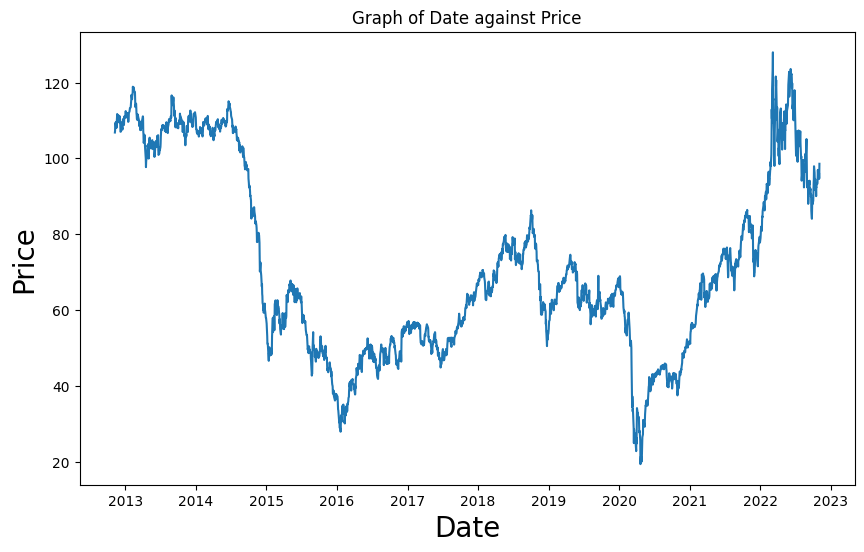

In [ ]:
plt.figure(figsize=(10, 6), dpi=100)
plt.xlabel('Date', fontsize=20)
plt.ylabel('Price', fontsize=20)
plt.title("Graph of Date against Price")


plt.plot(df1.index, df['Close/Last'])
plt.savefig('rf_data_plot.png')



In [ ]:
# Splitting the data into features and labels

X = df.drop(['Close/Last', 'Date'], axis =1)
Y = df['Close/Last']
date = df['Date'].apply(str_to_datetime)

In [ ]:
dtrain, dtest = np.split(date, [int(len(date) * 0.8)])

In [ ]:
dval, dtest = np.split(dtest, [int(len(dtest) * 0.5)])

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size =0.2, random_state=42,shuffle=False)

In [ ]:
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size =0.5, random_state=42,shuffle=False)

Training the Model

In [ ]:
model = RandomForestRegressor()

In [ ]:
model.fit(x_train, y_train)

RandomForestRegressor()

Model Evaluation

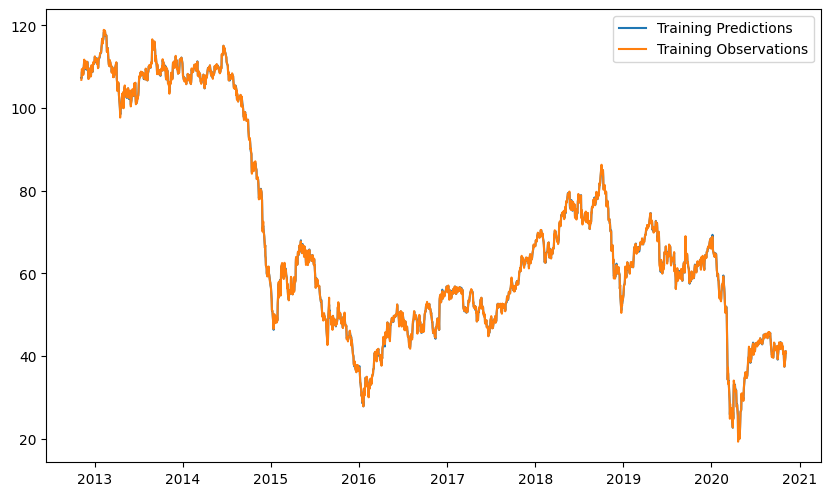

In [ ]:
train_prediction = model.predict(x_train)

plt.figure(figsize=(10, 6), dpi=100)

plt.plot(dtrain, train_prediction)
plt.plot(dtrain, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

plt.savefig("Train_pred_observe.png")

In [ ]:
train_score = r2_score(y_train, train_prediction)
train_score

0.999913319911657

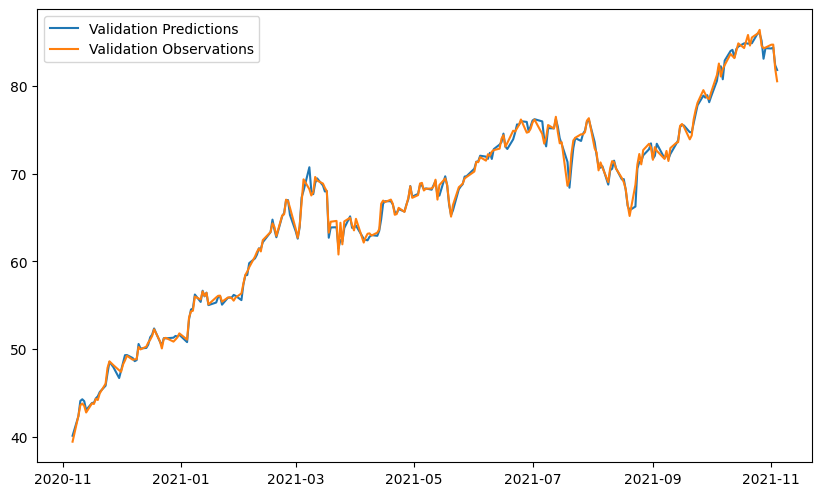

In [ ]:
Validation_predictions = model.predict(x_val)

plt.figure(figsize=(10, 6), dpi=100)

plt.plot(dval, Validation_predictions)
plt.plot(dval, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

plt.savefig("Val_pred_observe.png")

In [ ]:
#Coefficient of determination
from sklearn.metrics import r2_score
val_score = r2_score(y_val, Validation_predictions)
val_score

0.9972713121347373

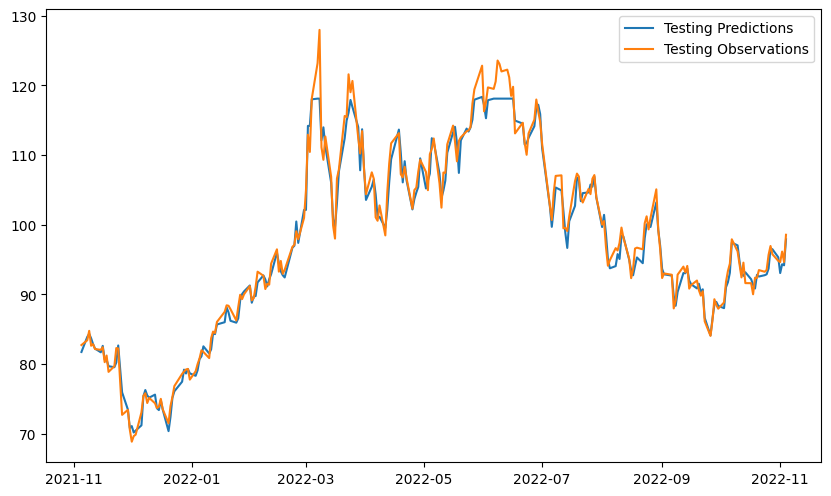

In [ ]:
test_predictions = model.predict(x_test)

plt.figure(figsize=(10, 6), dpi=100)

plt.plot(dtest, test_predictions)
plt.plot(dtest, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

plt.savefig("test_pred_observe.png")

In [ ]:
#Coefficient of determination
test_score= r2_score(y_test, test_predictions)
test_score

0.9834466899788127

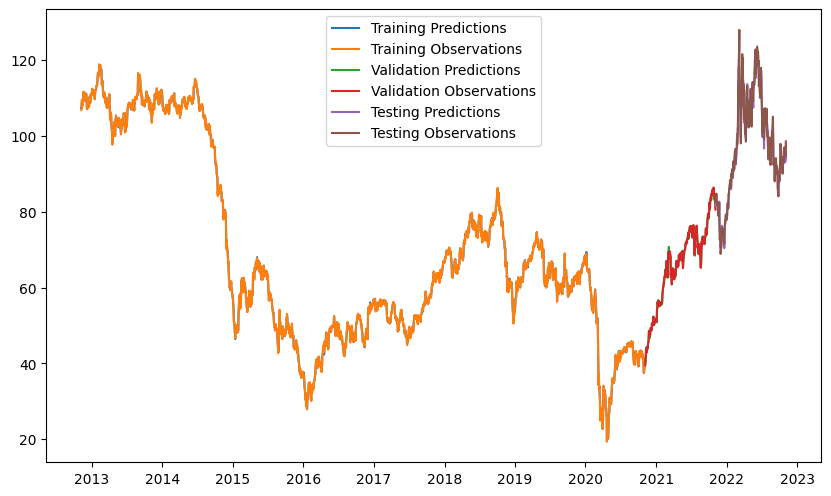

In [ ]:
plt.figure(figsize=(10, 6), dpi=100)
plt.plot(dtrain, train_prediction)
plt.plot(dtrain, y_train)
plt.plot(dval, Validation_predictions)
plt.plot(dval, y_val)
plt.plot(dtest, test_predictions)
plt.plot(dtest, y_test)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations',
            'Recursive Predictions'])
plt.savefig("Combined plot.png")

In [ ]:
#Score

print(train_score, val_score, test_score)


0.999913319911657 0.9972713121347373 0.9834466899788127
